In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def compute_probability(col):
    """
    Compute the probability of a certain event
    """
    return col.value_counts() / col.shape[0]

def compute_entropy(col):
    """
    Compute the entropy of a certain event
    """
    probabilities = compute_probability(col)
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

def compute_conditional_entropy(x, y):
    """
    Compute the conditional entropy between two random variables.
    Specifically, the conditional entropy of Y given X.
    """
    probability_x = compute_probability(x)
    
    temp_df = pd.DataFrame({'X': x, 'Y': y})
    
    conditional_entropy = 0
    
    # for unique event x_i
    for x_i in x.unique():
        # get the data for Y given X=x_i
        y_given_x = temp_df.loc[temp_df['X'] == x_i, 'Y']
        
        # compute the conditional entropy
        conditional_entropy += probability_x[x_i] * compute_entropy(y_given_x)
    
    return conditional_entropy

def compute_information_gain(x, y):
    """
    Compute the information gain between an attribute and class label
    """
    return compute_entropy(y) - compute_conditional_entropy(x, y)

In [22]:
# Load the three separate CSV files
low_quality_df = pd.read_csv('lowquality_final_merged.csv')
mid_quality_df = pd.read_csv('midquality_final_merged.csv')
high_quality_df = pd.read_csv('highquality_final_merged.csv')

# Add classification column based on rating range
low_quality_df['Classification'] = 'low'
mid_quality_df['Classification'] = 'mid'
high_quality_df['Classification'] = 'high'

# Concatenate the three DataFrames
combined_quality_df = pd.concat([low_quality_df, mid_quality_df, high_quality_df], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_quality_df.to_csv('combined_quality_ratings.csv', index=False)

combined_quality_df


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin,Book-Author-Encode,Book-Publisher-Encode,...,User-City,User-State,User-Country,User-Age,User-Age-Bin,User-City_Encoded,User-State_Encoded,User-Country_Encoded,User-Age-Encoded,Classification
0,276744,038550120X,7,painted house,JOHN GRISHAM,2001,Doubleday,"[2000, 2020)",2556,325,...,torrance,california,usa,-1,others,8447,5,6,0,low
1,16877,038550120X,9,painted house,JOHN GRISHAM,2001,Doubleday,"[2000, 2020)",2556,325,...,houston,others,usa,37,20~40,3767,23,6,38,low
2,16877,0743211383,3,dreamcatcher,Stephen King,2001,Scribner,"[2000, 2020)",5762,1062,...,houston,others,usa,37,20~40,3767,23,6,38,low
3,16877,0786868716,10,five people meet heaven,Mitch Albom,2003,Hyperion,"[2000, 2020)",4496,579,...,houston,others,usa,37,20~40,3767,23,6,38,low
4,16877,034539657X,7,dark river heart,Dean R. Koontz,1995,Ballantine Books,"[1980, 2000)",1417,111,...,houston,others,usa,37,20~40,3767,23,6,38,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197855,35433,3499123665,10,die hexen von eastwick roman,John Updike,1987,Rowohlt Tb.,"[1980, 2000)",3145,1018,...,wangen,others,others,40,20~40,8858,23,3,41,high
197856,35433,3499150425,10,garp und wie er die welt sah,John Irving,1982,Rowohlt Tb.,"[1980, 2000)",3083,1018,...,wangen,others,others,40,20~40,8858,23,3,41,high
197857,35433,3548253881,9,da spiel,Stephen King,2002,Ullstein Tb,"[2000, 2020)",5762,1223,...,wangen,others,others,40,20~40,8858,23,3,41,high
197858,35433,3596259924,7,die unertragliche leichtigkeit de seins unbear...,Milan Kundera,1997,Distribooks Inc,"[1980, 2000)",4476,314,...,wangen,others,others,40,20~40,8858,23,3,41,high


In [23]:
for feature in ('User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age-Encoded'):
    print(feature, compute_information_gain(combined_quality_df[feature], combined_quality_df['Classification']).round(4))

User-City_Encoded 0.6791
Book-Rating 0.0055
Book-Author-Encode 0.101
Book-Publisher-Encode 0.0434
User-Country_Encoded 0.0086
User-State_Encoded 0.0224
Year-Of-Publication-Bin-Encode 0.0028
User-Age-Encoded 0.0638


In [6]:
# User City has highest information gain so proceed we choose user city to perform first split on
 
X = combined_quality_df[['User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age-Encoded']]
y = combined_quality_df['Classification']

dt = DecisionTreeClassifier(criterion='entropy' # we specify entropy for IG
                           )
dt.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

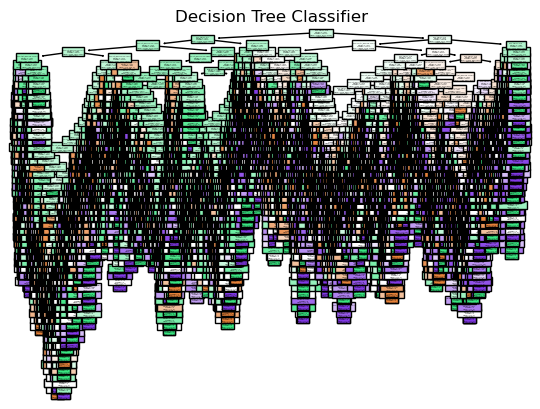

In [8]:
plot_tree(dt, # the DT classifier
          feature_names=['User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age-Encoded'], # feature names
          class_names=['low', 'mid','high'], # class labels
          filled=True # fill in the rectangles
         )

plt.title("Decision Tree Classifier")

plt.show()

In [28]:
sample_df = combined_quality_df.sample(frac = 0.02, random_state = 42)
sample_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin,Book-Author-Encode,Book-Publisher-Encode,...,User-City,User-State,User-Country,User-Age,User-Age-Bin,User-City_Encoded,User-State_Encoded,User-Country_Encoded,User-Age-Encoded,Classification
75393,128192,0446606189,8,cat mouse alex cross novel,James Patterson,1998,Warner Books,"[1980, 2000)",2694,1277,...,brush prairie,washington,usa,-1,others,1089,32,6,0,low
136277,7286,0140502343,10,story ferdinand picture puffin,Munro Leaf,1977,Puffin Books,"[1960, 1980)",4532,947,...,pasco,washington,usa,28,20~40,6361,32,6,29,mid
143974,174216,0345426037,10,broken heart club conrad voort novel paperback,Ethan Black,2000,Ballantine Books,"[2000, 2020)",1893,111,...,hamilton,others,usa,36,20~40,3396,23,6,37,high
72609,21425,0553294385,8,robot,ISAAC ASIMOV,1991,Spectra,"[1980, 2000)",2416,1115,...,virginia beach,others,usa,60,40~60,8768,23,6,61,low
121119,142584,0451163524,7,drawing three dark tower book,Stephen King,1997,Signet Book,"[1980, 2000)",5762,1081,...,hot springs,others,usa,21,20~40,3762,23,6,22,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46372,47383,0743206045,7,daddy little girl,Mary Higgins Clark,2002,Simon & Schuster,"[2000, 2020)",4239,1087,...,malone,washington,usa,55,40~60,4914,32,6,56,low
99121,224340,0380731851,10,mystic river,Dennis Lehane,2002,HarperTorch,"[2000, 2020)",1474,528,...,kansas city,others,usa,45,40~60,4053,23,6,46,mid
100416,224303,0440236673,10,brother,John Grisham,2000,Island,"[2000, 2020)",3079,605,...,bradenton,florida,usa,-1,others,955,8,6,0,mid
112280,138198,1558744290,7,chicken soup woman soul chicken soup soul seri...,Jack Canfield,1996,Health Communications,"[1980, 2000)",2589,551,...,edmonton,alberta,canada,37,20~40,2405,0,1,38,mid


In [29]:
for feature in ('User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age-Encoded'):
    print(feature, compute_information_gain(sample_df[feature], sample_df['Classification']).round(4))

User-City_Encoded 0.8923
Book-Rating 0.0076
Book-Author-Encode 0.6954
Book-Publisher-Encode 0.2183
User-Country_Encoded 0.0109
User-State_Encoded 0.0278
Year-Of-Publication-Bin-Encode 0.0031
User-Age-Encoded 0.086


In [49]:
# User City has highest information gain so proceed we choose user city to perform first split on
 
X = sample_df[['User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age-Encoded']]
y = sample_df['Classification']

dt = DecisionTreeClassifier(criterion='entropy' # we specify entropy for IG
 ,max_depth=3                           )
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

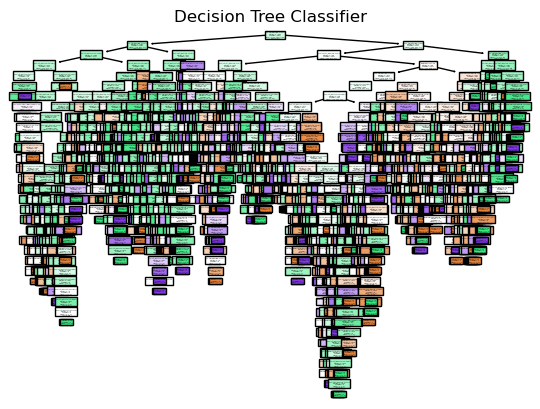

In [31]:
plot_tree(dt, # the DT classifier
          feature_names=['User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age-Encoded'], # feature names
          class_names=['low', 'mid','high'], # class labels
          filled=True # fill in the rectangles
         )

plt.title("Decision Tree Classifier")

plt.show()

In [42]:
sample_df = combined_quality_df.sample(frac = 0.0108, random_state = 42)
sample_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin,Book-Author-Encode,Book-Publisher-Encode,...,User-City,User-State,User-Country,User-Age,User-Age-Bin,User-City_Encoded,User-State_Encoded,User-Country_Encoded,User-Age-Encoded,Classification
75393,128192,0446606189,8,cat mouse alex cross novel,James Patterson,1998,Warner Books,"[1980, 2000)",2694,1277,...,brush prairie,washington,usa,-1,others,1089,32,6,0,low
136277,7286,0140502343,10,story ferdinand picture puffin,Munro Leaf,1977,Puffin Books,"[1960, 1980)",4532,947,...,pasco,washington,usa,28,20~40,6361,32,6,29,mid
143974,174216,0345426037,10,broken heart club conrad voort novel paperback,Ethan Black,2000,Ballantine Books,"[2000, 2020)",1893,111,...,hamilton,others,usa,36,20~40,3396,23,6,37,high
72609,21425,0553294385,8,robot,ISAAC ASIMOV,1991,Spectra,"[1980, 2000)",2416,1115,...,virginia beach,others,usa,60,40~60,8768,23,6,61,low
121119,142584,0451163524,7,drawing three dark tower book,Stephen King,1997,Signet Book,"[1980, 2000)",5762,1081,...,hot springs,others,usa,21,20~40,3762,23,6,22,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49321,102945,0061098035,9,burn factor,Kyle Mills,2002,HarperTorch,"[2000, 2020)",3581,528,...,meshoppen,others,usa,-1,others,5179,23,6,0,low
28189,213941,0385730586,10,sisterhood traveling pant,ANN BRASHARES,2003,Delacorte Books for Young Readers,"[2000, 2020)",54,284,...,lorain,others,usa,20,0~20,4751,23,6,21,low
40476,243276,0670887579,8,star called henry,Roddy Doyle,1999,Viking Books,"[1980, 2000)",5372,1247,...,contoocook,others,usa,-1,others,1805,23,6,0,low
115478,118228,0802139256,8,peace like river,Leif Enger,2002,Grove Press,"[2000, 2020)",3743,475,...,denver,others,usa,-1,others,2113,23,6,0,mid


In [43]:
for feature in ('User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age-Encoded'):
    print(feature, compute_information_gain(sample_df[feature], sample_df['Classification']).round(4))

User-City_Encoded 0.9983
Book-Rating 0.0125
Book-Author-Encode 0.8587
Book-Publisher-Encode 0.2925
User-Country_Encoded 0.0094
User-State_Encoded 0.0358
Year-Of-Publication-Bin-Encode 0.0018
User-Age-Encoded 0.0901


In [44]:
# User City has highest information gain so proceed we choose user city to perform first split on
 
X = sample_df[['User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age-Encoded']]
y = sample_df['Classification']

dt = DecisionTreeClassifier(criterion='entropy' # we specify entropy for IG
                           )
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

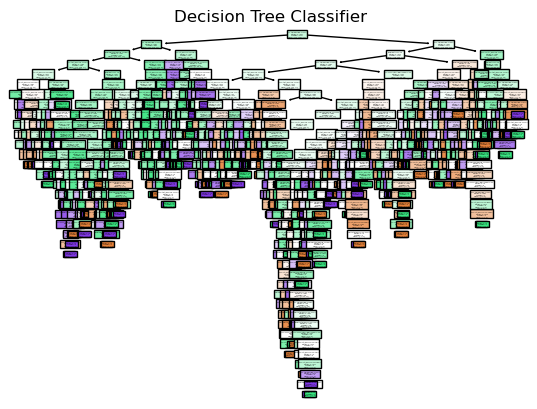

In [45]:
plot_tree(dt, # the DT classifier
          feature_names=['User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age-Encoded'], # feature names
          class_names=['low', 'mid','high'], # class labels
          filled=True # fill in the rectangles
         )

plt.title("Decision Tree Classifier")

plt.show()

In [55]:
# User City has highest information gain so proceed we choose user city to perform first split on
 
for feature in ('User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Country_Encoded','User-State_Encoded','Year-Of-Publication-Bin-Encode','User-Age-Encoded'):
    print(feature, compute_information_gain(combined_quality_df[feature], combined_quality_df['Classification']).round(4))

dt = DecisionTreeClassifier(criterion='entropy' # we specify entropy for IG
 ,max_depth=3)
dt.fit(X, y)

print("Feature Importances:", dt.feature_importances_)

User-City_Encoded 0.6791
Book-Rating 0.0055
Book-Author-Encode 0.101
Book-Publisher-Encode 0.0434
User-Country_Encoded 0.0086
User-State_Encoded 0.0224
Year-Of-Publication-Bin-Encode 0.0028
User-Age-Encoded 0.0638
Feature Importances: [0.04694022 0.16205804 0.         0.10147801 0.68952373]


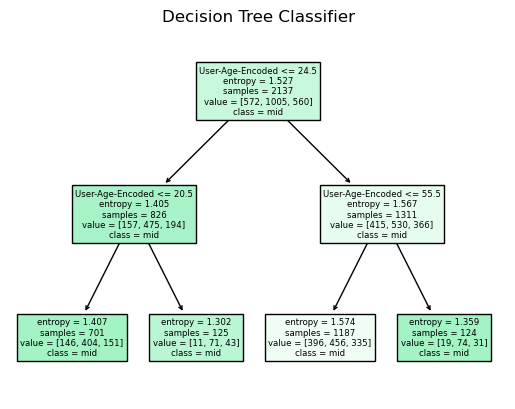

In [53]:
plot_tree(dt, # the DT classifier
          feature_names=['User-City_Encoded','Book-Rating', 'Book-Author-Encode', 'Book-Publisher-Encode','User-Age-Encoded'], # feature names
          class_names=['low', 'mid','high'], # class labels
          filled=True # fill in the rectangles
         )

plt.title("Decision Tree Classifier")

plt.show()